# The purpose of this study was to perform market basket analysis and conduct association rules to understand the most frequent items that are brought together along with their confidence level and lift value

In [1]:
#Import all the required libraries
import pandas as pd
import numpy as np

#Import all the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing all the statistical libraries for analysis
from mlxtend.frequent_patterns import association_rules, apriori

In [2]:
df = pd.read_csv('bread basket.csv')
df.shape  #Understanding the dataset, its clear that there are 20507 records and 5 columns

(20507, 5)

In [3]:
df.head() #Extracting the first 5 records with all the columns

,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [4]:
df.tail() #Extracting the last 5 records with all the columns

,Transaction,Item,date_time,period_day,weekday_weekend
20502,9682,Coffee,09-04-2017 14:32,afternoon,weekend
20503,9682,Tea,09-04-2017 14:32,afternoon,weekend
20504,9683,Coffee,09-04-2017 14:57,afternoon,weekend
20505,9683,Pastry,09-04-2017 14:57,afternoon,weekend
20506,9684,Smoothies,09-04-2017 15:04,afternoon,weekend


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Transaction      20507 non-null  int64 
 1   Item             20507 non-null  object
 2   date_time        20507 non-null  object
 3   period_day       20507 non-null  object
 4   weekday_weekend  20507 non-null  object
dtypes: int64(1), object(4)
memory usage: 801.2+ KB


It's clear that all the columns except for transaction belongs to object value and transaction data is an integer value

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Transaction,20507.0,4976.20237,2796.203001,1.0,2552.0,5137.0,7357.0,9684.0


There is only transactions column having numerical information and from this it's clear that,
1. The data seems to be almost normally distributed since the median value is just comparatively higher when compared to the mean.
2. The min value in the dataset is 1 and the max value is 9684

In [7]:
df.isnull().sum()

Transaction        0
Item               0
date_time          0
period_day         0
weekday_weekend    0
dtype: int64

The dataset seems to be pretty straight forward with no missing data

In [8]:
# Lets understand the count of unique transactions that we're made
df['Transaction'].nunique()

9465

These 9465 unique transactions could be made by all unique customers (which would not be the general situation) or just the number of transactions by some repetitive customers so let's understand that better

# Data Cleaning

In [9]:
# The date_time column is stored incorrectly with the data type being string values so lets convert them right.

# converting string literal to date format
df['date_time'] = pd.to_datetime(df['date_time']) 

#splitting only the date info into (yy-mm-dd) format and storing it in date column
df['date'] = df['date_time'].dt.date 

#splitting only the time info and storing it in time column
df['time'] = df['date_time'].dt.time

#Getting only the month information and storing it in the new column
df['month'] = df['date_time'].dt.month
month_dict = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'  }
df['month'] = df['month'].map(month_dict) #converting numerical association to month names

#Splitting the hour information
df['hour'] = df['date_time'].dt.hour


In [10]:
df.dtypes

Transaction                 int64
Item                       object
date_time          datetime64[ns]
period_day                 object
weekday_weekend            object
date                       object
time                       object
month                      object
hour                        int64
dtype: object

In [11]:
len(df['month'].value_counts())  #it's clear that all the 12 months are present in the dataset

12

In [12]:
df['hour'].value_counts().sort_index(ascending=True)

1        1
7       24
8      645
9     1966
10    2666
11    3102
12    2854
13    2617
14    2640
15    2115
16    1343
17     368
18      82
19      48
20      22
21       3
22       8
23       3
Name: hour, dtype: int64

In [13]:
#Replacing hour with text
hour_in_num = [1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23]
len(hour_in_num)

hour_in_obj = {1: '1-2', 7: '7-8', 8: '8-9', 9: '9-10', 10: '10-11', 11: '11-12', 12: '12-13', 13: '13-14', 
               14: '14-15', 15: '15-16', 16: '16-17', 17: '17-18', 18: '18-19', 19: '19-20', 
               20: '20-21', 21: '21-22', 22: '22-23', 23:'23-24'}

df['hour'] = df['hour'].map(hour_in_obj)

print(len(hour_in_num), len(hour_in_obj)) #The data has been stored correctly

18 18


In [14]:
#Extracting weekday and replacing it with text
df['Weekday'] = df['date_time'].dt.weekday
Weekday_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday' , 5:'Saturday' , 6:'Sunday'} 
df['Weekday'] = df['Weekday'].map(Weekday_dict)

In [15]:
#Now that we have split and leveraged the date_time column we can drop it
df = df.drop('date_time', axis=1)

In [16]:
df

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,Weekday
0,1,Bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,Scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,Hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,Jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
...,...,...,...,...,...,...,...,...,...
20502,9682,Coffee,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
20503,9682,Tea,afternoon,weekend,2017-09-04,14:32:00,September,14-15,Monday
20504,9683,Coffee,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday
20505,9683,Pastry,afternoon,weekend,2017-09-04,14:57:00,September,14-15,Monday


In [17]:
#Lets now clean the item column

df['Item'] = df['Item'].str.strip()
df['Item'] = df['Item'].str.lower()

In [18]:
df.head(10) #Looks good now

,Transaction,Item,period_day,weekday_weekend,date,time,month,hour,Weekday
0,1,bread,morning,weekend,2016-10-30,09:58:00,October,9-10,Sunday
1,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
2,2,scandinavian,morning,weekend,2016-10-30,10:05:00,October,10-11,Sunday
3,3,hot chocolate,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
4,3,jam,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
5,3,cookies,morning,weekend,2016-10-30,10:07:00,October,10-11,Sunday
6,4,muffin,morning,weekend,2016-10-30,10:08:00,October,10-11,Sunday
7,5,coffee,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday
8,5,pastry,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday
9,5,bread,morning,weekend,2016-10-30,10:13:00,October,10-11,Sunday


# Data Visualisation

In [19]:
x1 = df['Item'].value_counts().head(20).index
y1 = df['Item'].value_counts().head(20).values

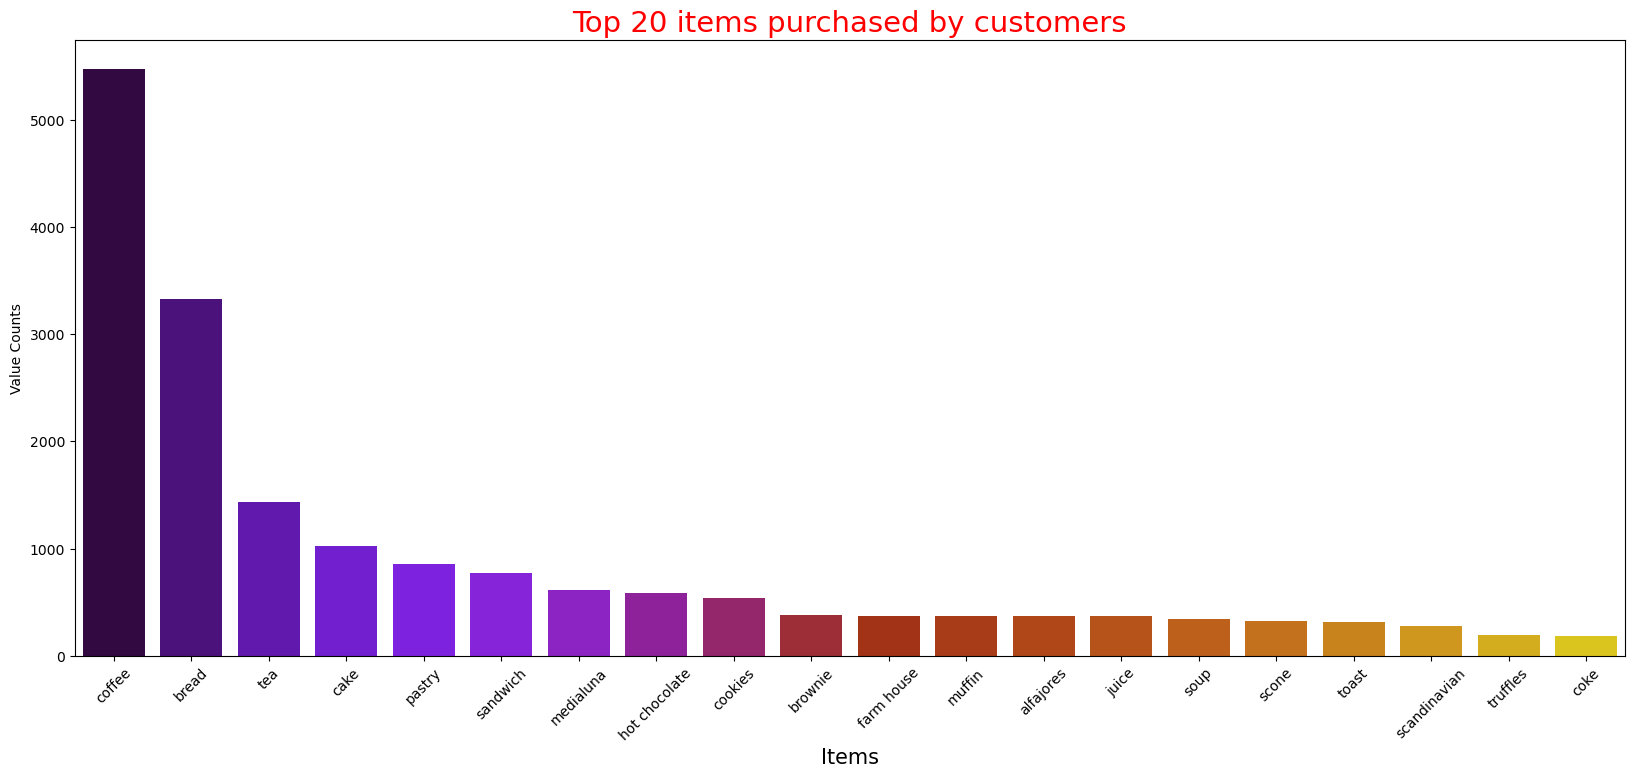

In [20]:
plt.figure(figsize=(20,8))
sns.barplot(x=x1, y=y1, palette = 'gnuplot')
plt.xlabel('Items', size=15)
plt.xticks(rotation=45)
plt.ylabel('Value Counts')
plt.title('Top 20 items purchased by customers', color='red', size=21)
plt.show()

It's clear that coffee has the highest transaction rate and coke being the 20th most purchased product

In [21]:
#Creating a variable called tran_month for grouping transactions and their subsequent month
tran_month = df.groupby('month')['Transaction'].count().reset_index()
tran_month

tran_month

,month,Transaction
0,April,1048
1,August,700
2,December,2647
3,February,2748
4,January,3027
5,July,741
6,June,739
7,March,3220
8,May,924
9,November,3076


In [22]:
# The month column above seems to be dis-oriented since its not in order so let's change that
tran_month.loc[:,"monthorder"] = [4,8,12,2,1,7,6,3,5,11,10,9]
tran_month.sort_values("monthorder", inplace = True)

In [23]:
tran_month #As we can see now, the month order has been fixed

,month,Transaction,monthorder
4,January,3027,1
3,February,2748,2
7,March,3220,3
0,April,1048,4
8,May,924,5
6,June,739,6
5,July,741,7
1,August,700,8
11,September,596,9
10,October,1041,10


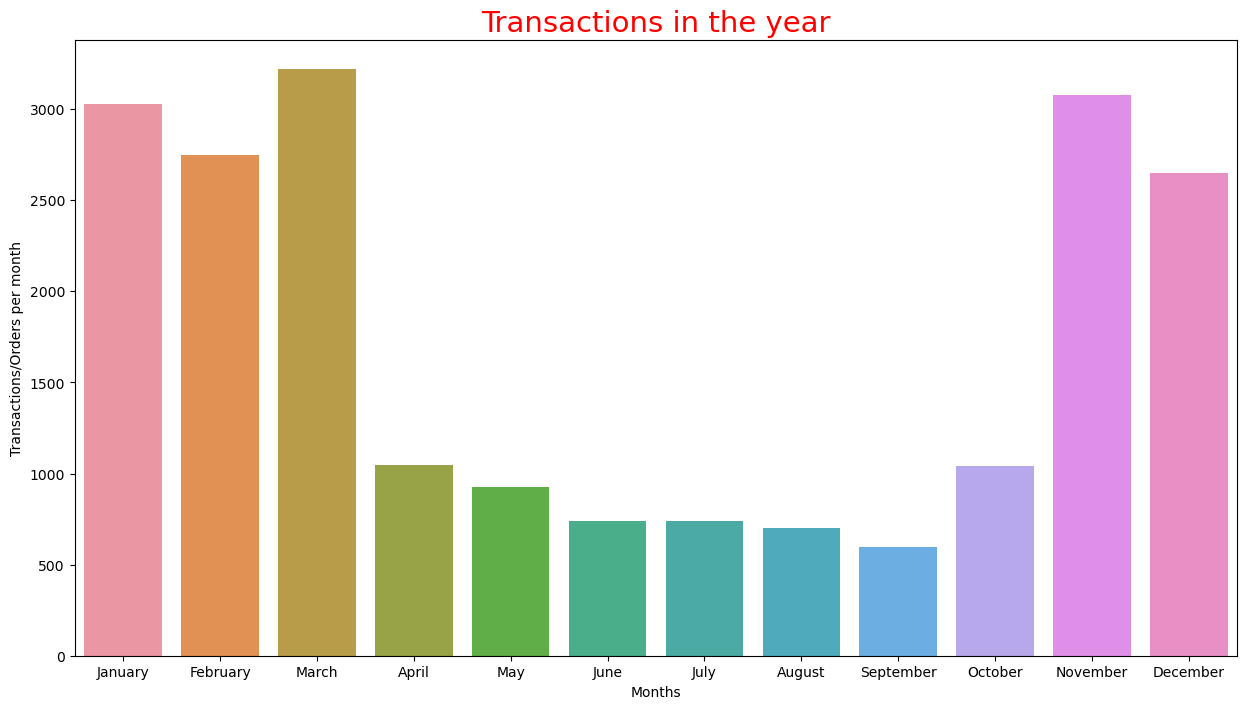

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x='month', y='Transaction', data=tran_month)
plt.xlabel("Months")
plt.ylabel("Transactions/Orders per month")
plt.title("Transactions in the year", color='red', size=21)
plt.show()

It's clear that most transactions were made in the earlier months and the last few months of the year.
1. March had the highest number of orders followed by November and January
2. February and December seemed to have almost the same number of orders

In [25]:
#Creating a variable called tran_week and grouping by week and transaction
tran_week = df.groupby('Weekday')['Transaction'].count().reset_index()
tran_week

,Weekday,Transaction
0,Friday,3266
1,Monday,3035
2,Saturday,3554
3,Sunday,3118
4,Thursday,2601
5,Tuesday,2645
6,Wednesday,2288


In [26]:
tran_week.loc[:,"weekorder"] = [4,0,5,6,3,1,2]
tran_week.sort_values('weekorder', inplace=True)

In [27]:
tran_week

,Weekday,Transaction,weekorder
1,Monday,3035,0
5,Tuesday,2645,1
6,Wednesday,2288,2
4,Thursday,2601,3
0,Friday,3266,4
2,Saturday,3554,5
3,Sunday,3118,6


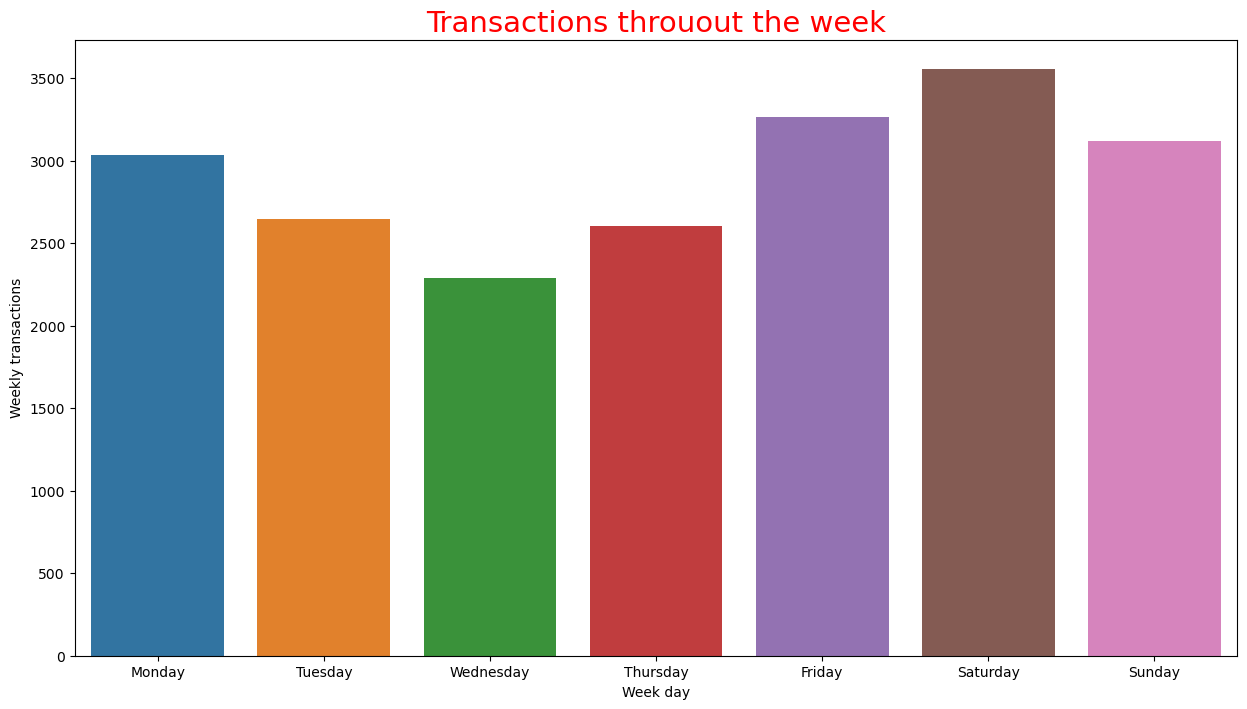

In [28]:
plt.figure(figsize=(15,8))
sns.barplot(x='Weekday', y='Transaction', data=tran_week)
plt.xlabel("Week day")
plt.ylabel("Weekly transactions")
plt.title("Transactions throuout the week", color="red", size=21)
plt.show()

It's clear that there are more orders placed on saturday in comparisson to any order day of the week

In [29]:
tran_hour = df.groupby('hour')['Transaction'].count().reset_index()
tran_hour

,hour,Transaction
0,1-2,1
1,10-11,2666
2,11-12,3102
3,12-13,2854
4,13-14,2617
5,14-15,2640
6,15-16,2115
7,16-17,1343
8,17-18,368
9,18-19,82


In [30]:
tran_hour.loc[:,"hour_transaction"] = [1,10,11,12,13,14,15,16,17,18,19,20,21,22,23,7,8,9]
tran_hour.sort_values('hour_transaction', inplace=True)
tran_hour

,hour,Transaction,hour_transaction
0,1-2,1,1
15,7-8,24,7
16,8-9,645,8
17,9-10,1966,9
1,10-11,2666,10
2,11-12,3102,11
3,12-13,2854,12
4,13-14,2617,13
5,14-15,2640,14
6,15-16,2115,15


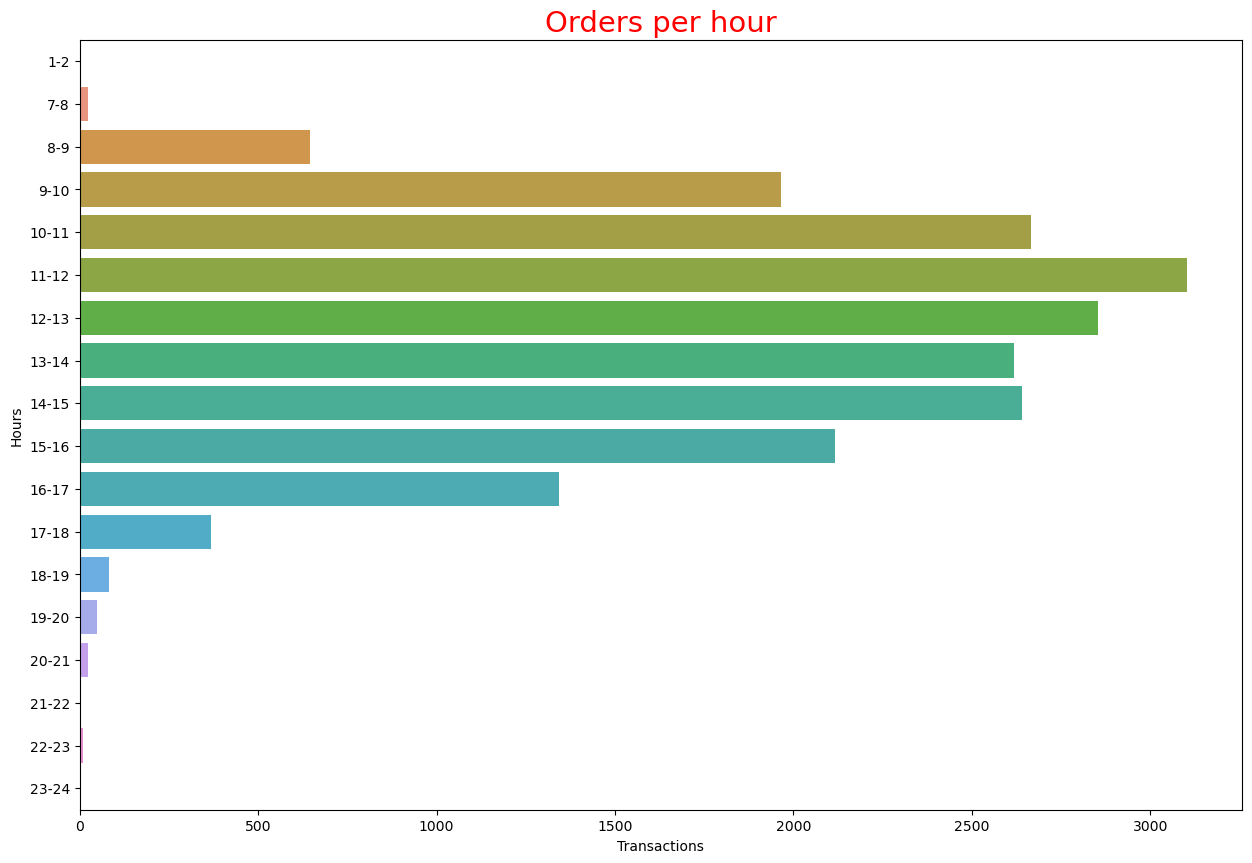

In [31]:
plt.figure(figsize=(15,10))
sns.barplot(x='Transaction', y='hour', data=tran_hour)
plt.xlabel("Transactions")
plt.ylabel("Hours")
plt.title("Orders per hour", color='red', size=21)
plt.show()

It's clear that most of the items are brought at 11-12 time frame followed by 12-13 and 9-10 time frame or hour of the day

In [32]:
#Creating a variable transact_period and grouping transactions and period_day
transact_period = df.groupby('period_day')['Transaction'].count().reset_index()
transact_period

,period_day,Transaction
0,afternoon,11569
1,evening,520
2,morning,8404
3,night,14


In [33]:
transact_period.loc[:,"order_time"] = [2,3,1,4]
transact_period

,period_day,Transaction,order_time
0,afternoon,11569,2
1,evening,520,3
2,morning,8404,1
3,night,14,4


In [34]:
transact_period.sort_values('order_time', inplace=True)
transact_period

,period_day,Transaction,order_time
2,morning,8404,1
0,afternoon,11569,2
1,evening,520,3
3,night,14,4


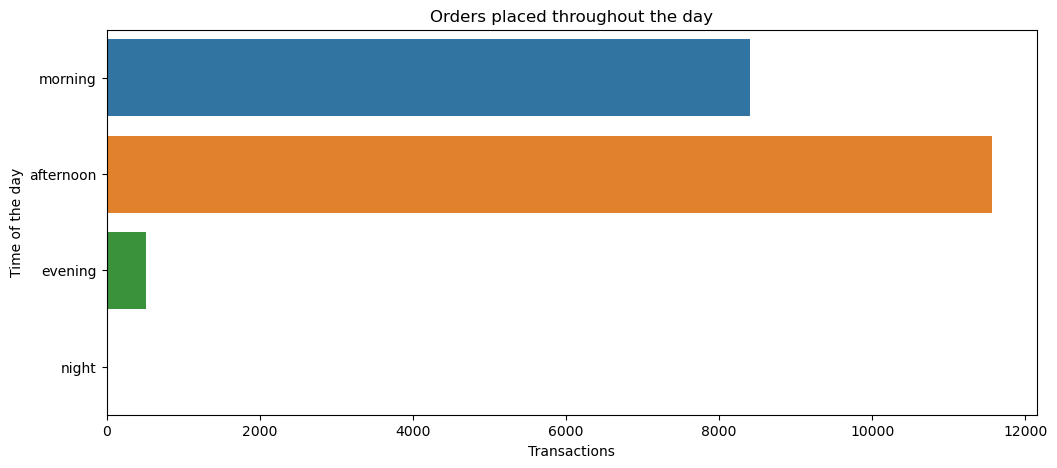

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(x='Transaction', y='period_day', data=transact_period)
plt.xlabel("Transactions")
plt.ylabel("Time of the day")
plt.title("Orders placed throughout the day")
plt.show()

It's clear that most of the orders were placed in the afternoon times than any other time of the day followed by orders placed in the morning

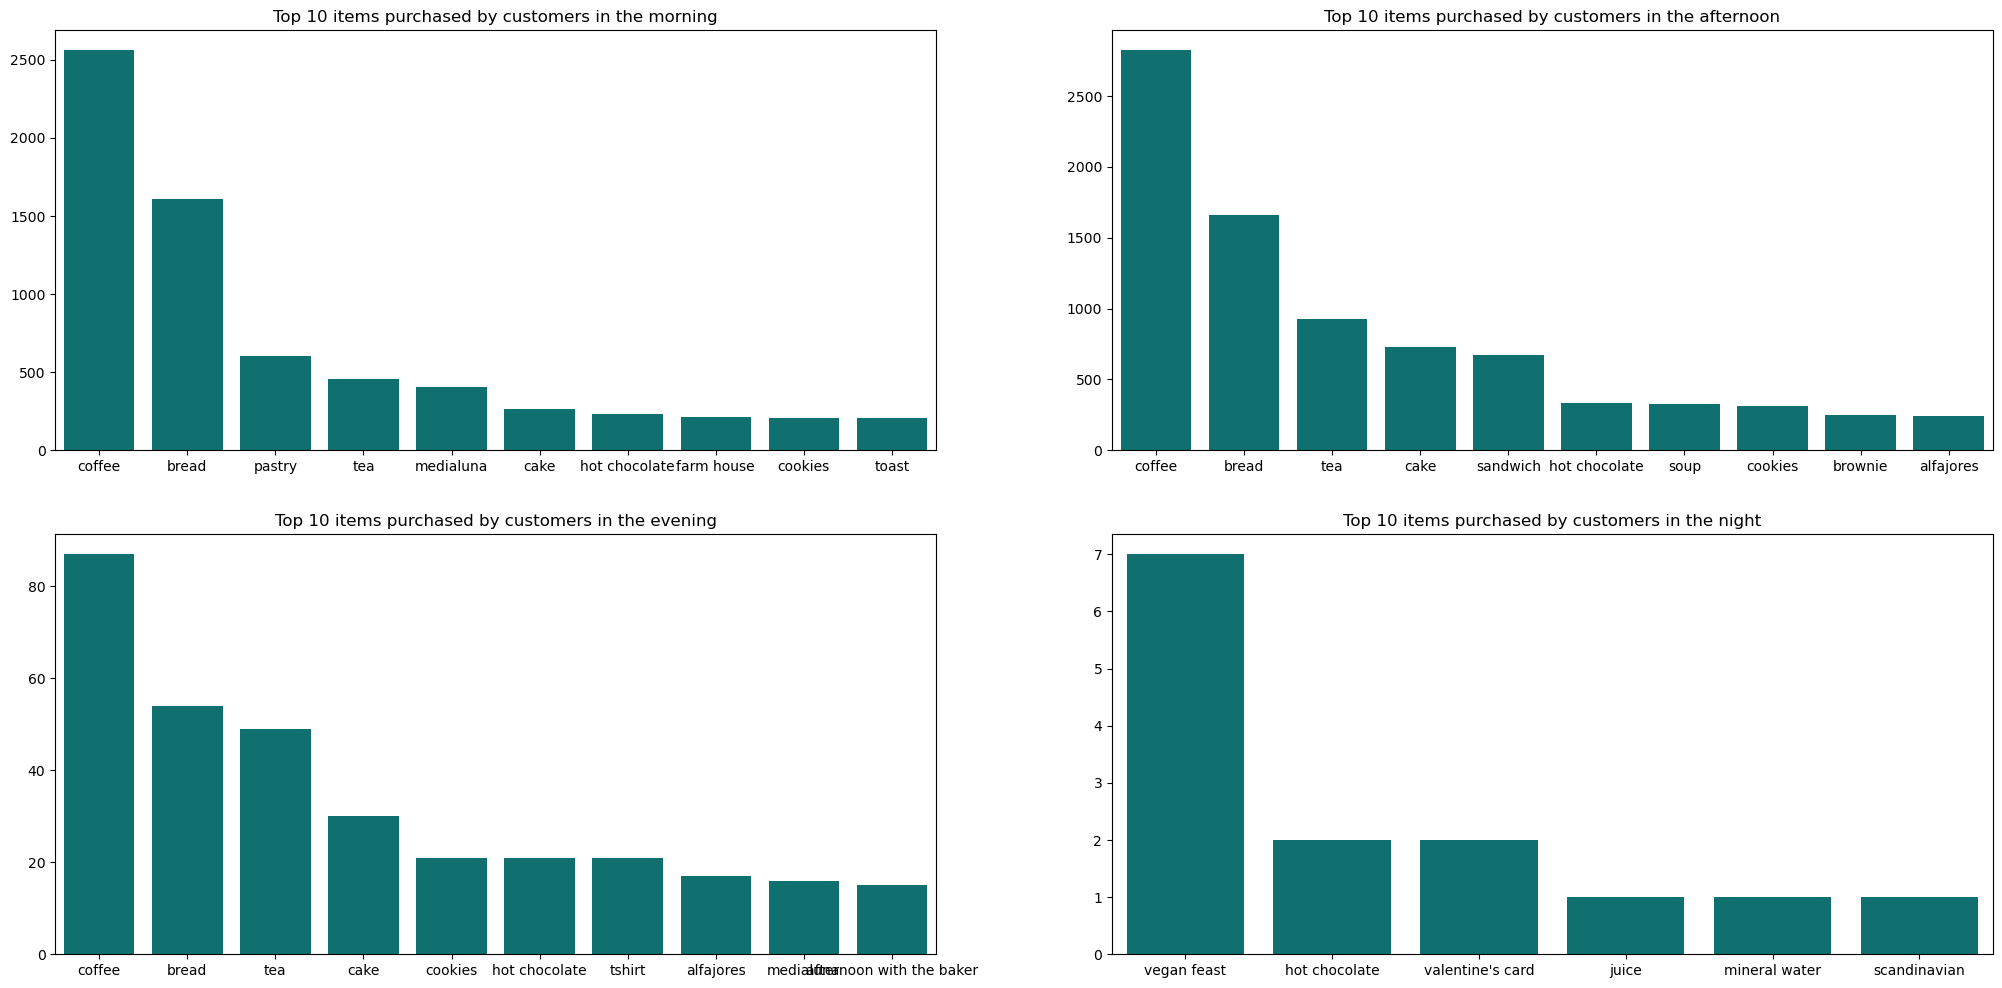

In [52]:
#Understanding the items placed for order in the morning, afternoon, evening and night accordingly
data = df.groupby(['period_day', 'Item'])['Transaction'].count().reset_index().sort_values(['period_day','Transaction'], ascending=False)
day = ['morning', 'afternoon', 'evening', 'night']

plt.figure(figsize=(25,12))
for i, j in enumerate(day):
    plt.subplot(2,2,i+1)
    df1 = data[data['period_day']==j].head(10)
    sns.barplot(data=df1, x=df1['Item'], y=df1['Transaction'], color='teal')
    plt.xlabel('')
    plt.ylabel('')
    plt.title("Top 10 items purchased by customers in the {}".format(j), size=12)

plt.show()
    

Coffee was the most brought item followed by bread in the morning, afternoon and evening time. Where as vegan feast was the most brought item in the night followed by hot chocolate.

# Apriori Algorithm

In [54]:
#Creating a df with the transaction and item information
transactions_str = df.groupby(['Transaction', 'Item'])['Item'].count().reset_index(name='count')
transactions_str

,Transaction,Item,count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
...,...,...,...
18882,9682,tacos/fajita,1
18883,9682,tea,1
18884,9683,coffee,1
18885,9683,pastry,1


In [57]:
# Making a m*n matrice where m=transaction and n=items and each row returns if the item was in the transaction or not

my_basket = transactions_str.pivot_table(index='Transaction', columns='Item', values='count', aggfunc='sum').fillna(0)
my_basket.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
# Making a function that will return 0 or 1
# 0 indicates the item was not in the transaction and 1 indicates that the item was in the transaction

def encode(x):
    if x<=0:
        return 0
    if x>=0:
        return 1

In [66]:
# Now lets map this function onto the market basket dataset

mybasket_sets = my_basket.applymap(encode)
mybasket_sets.head()

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
mybasket_sets.shape

(9465, 94)

Lets now use the apriori algorithm upon this dataset with the min support of 0.1 ie. atleast 1% of the transactions
which is atleast 94 transactions out of 9465 transactions in the dataset only then we will consider the item to be a frequent itemset

In [72]:
frequent_sets = apriori(mybasket_sets, min_support = 0.01, use_colnames=True)
frequent_sets

/Users/rajeevr/anaconda3/lib/python3.10/site-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.036344,(alfajores)
1,0.016059,(baguette)
2,0.327205,(bread)
3,0.040042,(brownie)
4,0.103856,(cake)
...,...,...
56,0.023666,"(toast, coffee)"
57,0.014369,"(sandwich, tea)"
58,0.010037,"(bread, cake, coffee)"
59,0.011199,"(pastry, bread, coffee)"


In [76]:
#Now that we have the frequent sets lets make association rules out of them

rules = association_rules(frequent_sets, metric='lift', min_threshold=1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574
1,(coffee),(alfajores),0.478394,0.036344,0.019651,0.041078,1.130235,0.002264,1.004936,0.220910
2,(pastry),(bread),0.086107,0.327205,0.029160,0.338650,1.034977,0.000985,1.017305,0.036980
3,(bread),(pastry),0.327205,0.086107,0.029160,0.089119,1.034977,0.000985,1.003306,0.050231
4,(brownie),(coffee),0.040042,0.478394,0.019651,0.490765,1.025860,0.000495,1.024293,0.026259
5,(coffee),(brownie),0.478394,0.040042,0.019651,0.041078,1.025860,0.000495,1.001080,0.048327
6,(cake),(coffee),0.103856,0.478394,0.054728,0.526958,1.101515,0.005044,1.102664,0.102840
7,(coffee),(cake),0.478394,0.103856,0.054728,0.114399,1.101515,0.005044,1.011905,0.176684
8,(cake),(hot chocolate),0.103856,0.058320,0.011410,0.109868,1.883874,0.005354,1.057910,0.523553
9,(hot chocolate),(cake),0.058320,0.103856,0.011410,0.195652,1.883874,0.005354,1.114125,0.498236


In [79]:
# arranging the data on the basis of confidence, highest to lowest
rules.sort_values('confidence', ascending=False, inplace=True)
rules[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
30,(toast),(coffee),0.033597,0.478394,0.023666,0.704403,1.472431,0.007593,1.764582,0.332006
28,(spanish brunch),(coffee),0.018172,0.478394,0.010882,0.598837,1.251766,0.002189,1.300235,0.204851
18,(medialuna),(coffee),0.061807,0.478394,0.035182,0.569231,1.189878,0.005614,1.210871,0.170091
22,(pastry),(coffee),0.086107,0.478394,0.047544,0.552147,1.154168,0.006351,1.164682,0.146161
0,(alfajores),(coffee),0.036344,0.478394,0.019651,0.540698,1.130235,0.002264,1.135648,0.119574


Let A be the antecedent and B be the consequent, so association rules explains the association btw the 2. The rule states that if a transaction contains A, it is likely that it will also contain B as we can see from the above, the antecedent is toast and the consequent is coffee so when a customer purchases toast there are high probability that the customer would also purchase coffee. 

In order to understand their relationship better lets take a look at their confidence, support and lift values.

Support - Support explains the proportion of transactions in the given dataset that contains the itemset. Here the support value is 0.02 so 0.02 proportion of transactions contain toast and coffee in the dataset.

Confidence - Confidence explains the proportion of transactions that contain the consequents given that they also contain antecedents. Here the confidence value is 0.7 indicating that 70% of the transactions having toast also contain coffee.

Lift - Lift measures how much more the consequent appears in the dataset that contain the antecedent compared to what would be expected if they 2 were statistically independent.Here the lift value is 1.47 indicating that consequent (coffee) is 1.47 times more likely to be present in the transaction containing the antecendent (toast) than if they were 2 independent. 